<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/Fig_07_ANN_parallel_coordenate_jun_24_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 174 (delta 18), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (174/174), 569.22 KiB | 5.64 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/Raianars_paper_One


In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices



In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_paper_One/ANN_read_matrix


In [5]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
Num=2500
Parallel_Coord=np.zeros((Num,6)) #
Max_DIr=X_max_F[0];Max_Fr=X_max_F[1]
Min_DIr=X_min_F[0];Min_Fr=X_min_F[1];Min_Fr=0
Max_F=X_max_F[2];Max_CR=X_max_F[3]
Min_F=X_min_F[2];Min_CR=X_min_F[3]

In [6]:
Parallel_F_pos=[];Parallel_CR_pos=[]
Parallel_F_neg=[];Parallel_CR_neg=[]
for i in range(Num):
  DIr=  Min_DIr+(Max_DIr-Min_DIr)*np.random.random();
  Frac=Min_Fr+(Max_Fr-Min_Fr)*np.random.random();
  Fo=Min_F+(Max_F-Min_F)*np.random.random();
  CRo=Min_CR+(Max_CR-Min_CR)*np.random.random();
  x_train=np.array([DIr,Frac,Fo,CRo])
  x_train=pd.DataFrame(x_train).T
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)
  Parallel_Coord[i,0]=DIr;Parallel_Coord[i,1]=Frac;
  Parallel_Coord[i,2]=Fo;Parallel_Coord[i,3]=CRo;
  Parallel_Coord[i,4]=y_cod_F[0];Parallel_Coord[i,5]=y_cod_CR[0];
  if(y_cod_F[0]>0):
    Parallel_F_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_F_neg.append(Parallel_Coord[i,:])
  if(y_cod_CR[0]>0):
    Parallel_CR_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_CR_neg.append(Parallel_Coord[i,:])

Parallel_Coord=pd.DataFrame(Parallel_Coord,columns =fields)

Parallel_Coord['F'].replace(-1, 'Neg',inplace=True)
Parallel_Coord['F'].replace(1, 'Pos',inplace=True)
Parallel_Coord['CR'].replace(-1, 'Neg',inplace=True)
Parallel_Coord['CR'].replace(1, 'Pos',inplace=True)

Parallel_F_pos=pd.DataFrame(Parallel_F_pos,columns =fields)
Parallel_F_neg=pd.DataFrame(Parallel_F_neg,columns =fields)
Parallel_CR_pos=pd.DataFrame(Parallel_CR_pos,columns =fields)
Parallel_CR_neg=pd.DataFrame(Parallel_CR_neg,columns =fields)

Parallel_F_pos['F'].replace(1, 'Pos',inplace=True)
Parallel_F_neg['F'].replace(-1, 'Neg',inplace=True)
Parallel_CR_pos['CR'].replace(1, 'Pos',inplace=True)
Parallel_CR_neg['CR'].replace(-1, 'Neg',inplace=True)

In [7]:
print(Parallel_Coord)

           DIr  FRAC Its        Fo       CRo    F   CR
0     1.328198  0.936107  0.080152  0.769972  Pos  Pos
1     0.904400  0.417693  0.540494  0.717807  Pos  Pos
2     0.997939  0.305970  0.565460  0.700730  Pos  Pos
3     0.384566  0.657458  0.660054  0.706251  Neg  Pos
4     1.227734  0.530357  0.374599  0.582699  Pos  Pos
...        ...       ...       ...       ...  ...  ...
2495  1.348124  0.093352  0.934984  0.274263  Neg  Neg
2496  1.173162  0.043529  0.059859  0.923121  Neg  Pos
2497  0.257348  0.161255  0.059658  0.205386  Pos  Neg
2498  1.021872  0.706649  0.497688  0.671790  Pos  Pos
2499  0.711290  0.461594  0.172760  0.173867  Pos  Pos

[2500 rows x 6 columns]


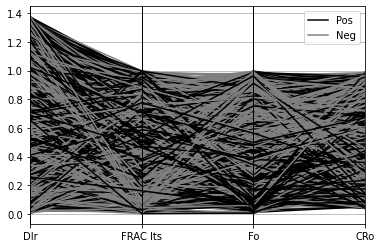

In [8]:


DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F', color=['black','gray'])
plt.show()

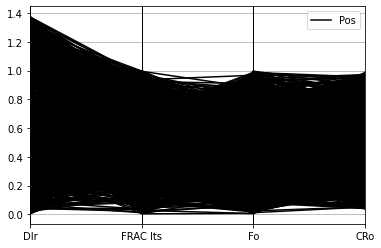

In [9]:
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

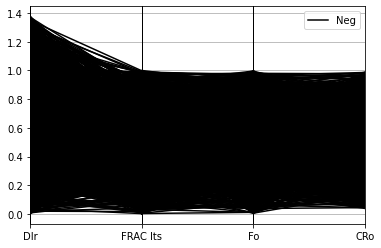

In [10]:
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

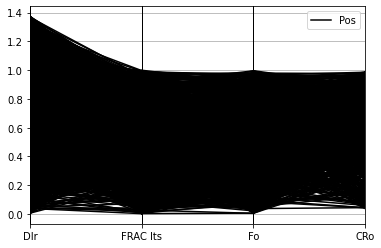

In [11]:
DF_CR=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()

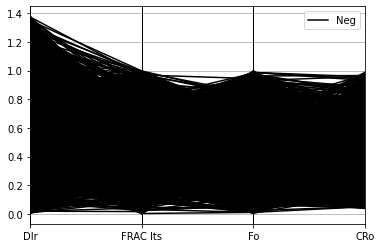

In [12]:
DF_CR=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()

In [13]:
Cols_name=['F 25: Scale Factor 25 points ',' ',' ',
           'F 250: Scale Factor 250 points ',' ',' ',
           'F 250: Scale Factor 250 points ',' ',' ',
           'CR 25: Crossover 25 points ',' ',' ',
           'CR 250: Crossover 250 points ',' ',' ',
           'CR 2500: Crossover 2500 points ',' ',' ',]


Legends=['a)', 'b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)', 'n)']

In [14]:
len(Cols_name)

18

In [15]:
Parallel_Coord

,DIr,FRAC Its,Fo,CRo,F,CR
0,1.328198,0.936107,0.080152,0.769972,Pos,Pos
1,0.904400,0.417693,0.540494,0.717807,Pos,Pos
2,0.997939,0.305970,0.565460,0.700730,Pos,Pos
3,0.384566,0.657458,0.660054,0.706251,Neg,Pos
4,1.227734,0.530357,0.374599,0.582699,Pos,Pos
...,...,...,...,...,...,...
2495,1.348124,0.093352,0.934984,0.274263,Neg,Neg
2496,1.173162,0.043529,0.059859,0.923121,Neg,Pos
2497,0.257348,0.161255,0.059658,0.205386,Pos,Neg
2498,1.021872,0.706649,0.497688,0.671790,Pos,Pos


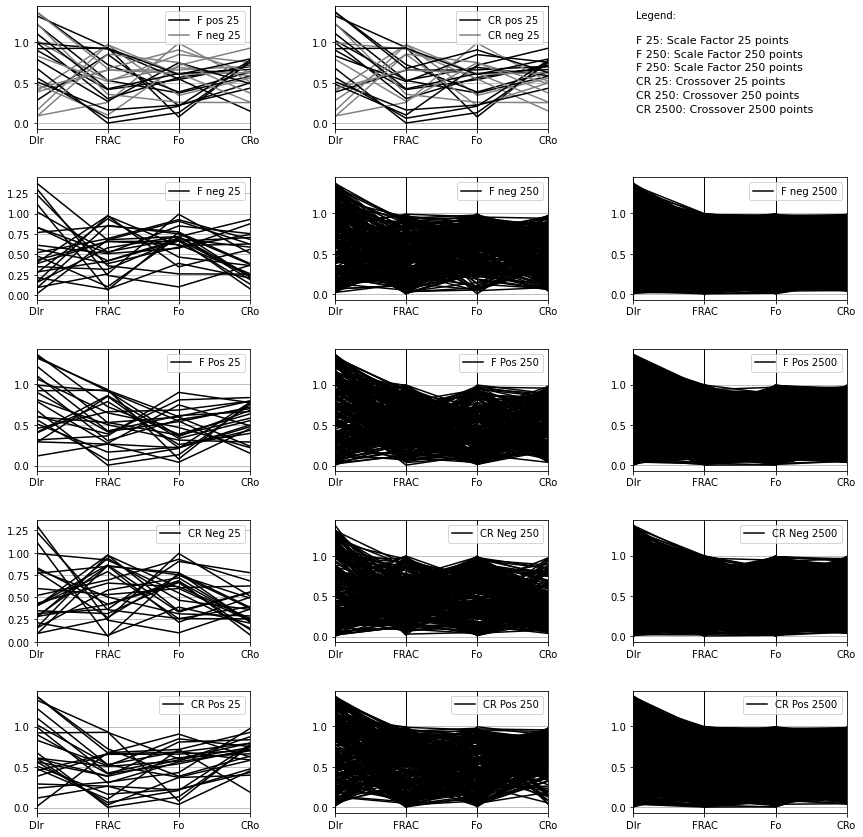

In [16]:
Ind=['DIr','FRAC','Fo','CRo','F']
Ind_CR=['DIr','FRAC','Fo','CRo','CR']

plt.subplot(5,3,1)
DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F=DF_F.iloc[:24,:]
DF_F['F'].replace('Pos', 'F pos 25',inplace=True)
DF_F['F'].replace('Neg', 'F neg 25',inplace=True)
pd.plotting.parallel_coordinates(DF_F, 'F', color=['black','gray'])


plt.subplot(5,3,2)
DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F=DF_F.iloc[:24,:]
DF_F['CR'].replace('Pos', 'CR pos 25',inplace=True)
DF_F['CR'].replace('Neg', 'CR neg 25',inplace=True)
pd.plotting.parallel_coordinates(DF_F, 'CR', color=['black','gray'])


plt.subplot(5,3,3)
h=80
dh=8
hh=80  
plt.ylim(0, hh)     # set the ylim to bottom, top
plt.xlim(0, hh)     # set the ylim to bottom, top
plt.axis('off')
plt.text(1,hh-dh,'Legend:',fontsize=10, color = 'k')
for i in range(len(Cols_name)):
  y=h-i*3-3*dh
  plt.text(1,y,Cols_name[i],fontsize=11, color = 'k')

plt.subplot(5,3,4)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,5)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,6)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')


plt.subplot(5,3,7)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,8)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,9)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')



plt.subplot(5,3,10)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,11)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,12)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')


plt.subplot(5,3,13)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,14)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,15)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')


plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [17]:
len(Cols_name)

18